# decentralized
Primary development and execution script for evaluation of game theoretic control algorithms.

References:
1. [Fridovich-Keil - ilqgames](https://github.com/HJReachability/ilqgames/blob/master/python/dynamical_system.py)
1. [anass - ilqr](https://github.com/anassinator/ilqr)
1. [Jackson - AL iLQR Tutorial](https://bjack205.github.io/papers/AL_iLQR_Tutorial.pdf)

In [13]:
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from decentralized import (
    iLQR, RecedingHorizonController,
    MultiDynamicalModel, CarDynamics, UnicycleDynamics, BicycleDynamics,
    ObstacleCost, ReferenceCost, CouplingCost, AgentCost, GameCost,
    NumericalDiffCost, Point
)

In [57]:
%matplotlib ipympl
import matplotlib
matplotlib.rcParams['axes.grid'] = True
np.set_printoptions(precision=6)

In [3]:
f1 = plt.figure(figsize=(6.76, 3.89))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
f2 = plt.figure(figsize=(7.15, 2.21))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [5]:
f3 = plt.figure()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Single Agent

In [6]:
from decentralized.analytical_models import CarDynamics as CarDynamicsAn

In [53]:
dt = 0.1
N = 60
n_lqr_iter = 50
tol = 1e-6

REF_WEIGHT = 1.0
OBS_WEIGHT = 1e3

# dynamics = DoubleInt1dDynamics(dt)
# x0 = np.array([2, 0])
# xf = np.array([0, 1])
# Q = np.eye(2)
# R = np.eye(1)

# dynamics = DoubleInt2dDynamics(dt)
# x0 = np.array([10, 10, 0, 0])
# xf = np.array([0, 0, 0, 0])
# Q = np.diag([1, 1, 0, 0])
# R = np.eye(2)

dynamics = CarDynamicsAn(dt)
# dynamics = CarDynamics(dt)
x0 = np.array([5, 0, 0])
xf = np.array([-5, 0, np.pi/2])
Q = np.diag([1, 1, 0])
R = np.eye(2) * 10

# dynamics = UnicycleDynamics(dt)
# x0 = np.array([-5, -5, 0, 0])
# xf = np.array([5, 5, 0, np.pi/2])
# Q = np.diag([1, 1, 0, 0])
# R = np.eye(2)

# dynamics = BicycleDynamics(dt)
# x0 = np.array([10, 10, np.pi/2, 0, 0])
# xf = np.array([0, 0, 0, 0, 0])
# Q = np.diag([1, 1, 0, 0, 0])
# R = np.eye(2)

Qf = np.eye(Q.shape[0]) * 1e3
reference = ReferenceCost(xf, Q, R, Qf, REF_WEIGHT)
# obstacles = [ObstacleCost((0, 1), Point(3, 3), 2, OBS_WEIGHT),
#              ObstacleCost((0, 1), Point(9, 7), 2, OBS_WEIGHT),
#              ObstacleCost((0, 1), Point(3, 10), 3, OBS_WEIGHT)]
# obstacles = [ObstacleDiffCost((0, 1), Point(0, 0.1), 2, OBS_WEIGHT)]
obstacles = [ObstacleCost((0, 1), Point(0, 0.1), 2, OBS_WEIGHT)]

agent_cost = AgentCost(obstacles + [reference])
game_cost = GameCost([agent_cost], [], [dynamics.n_x], [dynamics.n_u])

### Vanilla iLQR
Optimize the initial state over the controller's horizon.

In [54]:
ilqr = iLQR(dynamics, game_cost, N=N)
X, U, J = ilqr.run(x0, n_lqr_iter=n_lqr_iter, tol=tol)

0/50	J: 108471
1/50	J: 31779.5	μ: 0.5	Δ: 0.5
Failed line search.. increasing μ.
2/50	J: 31779.5	μ: 1	Δ: 2
Failed line search.. increasing μ.
3/50	J: 31779.5	μ: 4	Δ: 4
Failed line search.. increasing μ.
4/50	J: 31779.5	μ: 32	Δ: 8
Failed line search.. increasing μ.
5/50	J: 31779.5	μ: 512	Δ: 16
Failed line search.. increasing μ.
Exceeded max regularization term...


In [55]:
plt.figure(f1, clear=True)
ilqr.plot(
    X,
    do_headings=False, 
    surface_plot=True, 
    log_colors=True,
    coupling_radius=None,
    title_suffix=f': $J_f$ = {J:.3g}',
    axis=(-6, 6, -6, 6))

In [59]:
X_an = np.zeros((N+1, 3))
X_disc = np.zeros_like(X_an)
X_an[0] = x0
X_disc[0] = x0
for t, u in enumerate(U):
    X_an[t+1] = dynamics_an(X_an[t], u)
    X_disc[t+1] = dynamics_disc(X_disc[t], u)

In [58]:
dynamics_an = CarDynamics(dt)
dynamics_disc = CarDynamics(dt)
for x, u in zip(X, U):
    A1, B1 = dynamics_an.linearize(x, u)
    A2, B2 = dynamics_disc.linearize(x, u)
    # print(f"{A1}\n{A2}")
    # print(f"{B1}\n{B2}")

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]


### RHC iLQR
Optimize the initial state over a receding horizon according to a step size with additive noise.

In [29]:
step_size = 50
ilqr = iLQR(dynamics, game_cost, N=N)
rhc = RecedingHorizonController(x0, ilqr, step_size)

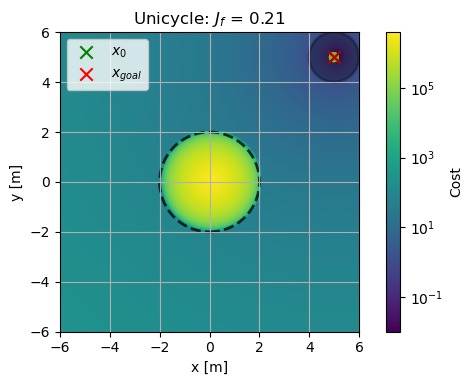

Converged!


In [30]:
U = np.zeros((N, ilqr.n_u))
x = x0
for X, U, J in rhc.run(U, n_lqr_iter=n_lqr_iter, tol=tol):
    # Apply the noisy control sequence.
    # X, J = rhc._controller._rollout(rhc.x, U)
    # rhc.x = X[-1]
    
    display.clear_output(wait=True)
    ilqr.plot(X,
          title_suffix=f': $J_f$ = {J:.3g}',
          do_headings=False, 
          surface_plot=True,
          log_colors=True,
          axis=(-6, 6, -6, 6))
    display.display(plt.gcf())
    plt.pause(1)

## Multi-Agent

In [6]:
class ObstacleDiffCost(NumericalDiffCost, ObstacleCost):
    pass

class CouplingDiffCost(NumericalDiffCost, CouplingCost):
    pass

In [7]:
dt = 0.05
N = 80
n_lqr_iter = 50
tol = 1e-3

x0 = np.array([
    -5, 0, 0, 0,
    -1, -5, 0, 0])
# x0 = np.array([
#     -1, 0.4, 0, 0,
#     1, -0.25, 0, 0])

OBS_WEIGHT = 1e3
REF_WEIGHT = 1
COUPLING_WEIGHT = 20.0
COUPLING_RADIUS = 1.0

obstacles = []
# obstacles = [ObstacleCost((0, 1), Point(-0.5, -0.1), 0.5, OBS_WEIGHT)]

uni1 = UnicycleDynamics(dt)
uni1_ref = ReferenceCost(xf=np.array([5, 0, 0, 0]),
                        Q=np.diag([1, 1, 0, 0]),
                        R=np.eye(2),
                        Qf=1e3*np.eye(4),
                        weight=REF_WEIGHT)
uni1_cost = AgentCost([uni1_ref] + obstacles)

uni2 = UnicycleDynamics(dt)
uni2_ref = ReferenceCost(xf=np.array([0, 5, 0, 0]),
                        Q=np.diag([1, 1, 0, 0]),
                        R=np.eye(2),
                        Qf=1e3*np.eye(4),
                        weight=REF_WEIGHT)
uni2_cost = AgentCost([uni2_ref] + obstacles)

# bike = BicycleDynamics(dt)
# bike_ref = ReferenceCost(xf=np.array([0, 5, 0, 0]),
#                          Q=np.diag([1, 1, 0, 0, 0]),
#                          R=np.eye(2),
#                          Qf=1e3*np.eye(5),
#                          weight=REF_WEIGHT)
# bike_cost = AgentCost([bike_ref] + obstacles)

dynamics = MultiDynamicalModel([uni1, uni2])

pos_inds = [(0, 1), (4, 5)]
coupling_costs = CouplingCost(pos_inds, radius=COUPLING_RADIUS, weight=COUPLING_WEIGHT)
# coupling_costs = CouplingDiffCost(pos_inds, radius=COUPLING_RADIUS, weight=COUPLING_WEIGHT)

game_cost = GameCost([uni1_cost, uni2_cost], [coupling_costs], dynamics.x_dims, dynamics.u_dims)

### Vanilla iLQR
Optimize the initial state over the controller's horizon.

In [17]:
ilqr = iLQR(dynamics, game_cost, N=N)
X, U, Jf = ilqr.run(x0, n_lqr_iter=n_lqr_iter, tol=tol)

0/50	J: 217080
1/50	J: 110970	μ: 0.5	Δ: 0.5
2/50	J: 109874	μ: 0.125	Δ: 0.25
3/50	J: 40669.3	μ: 0.015625	Δ: 0.125
4/50	J: 30432.1	μ: 0.000976562	Δ: 0.0625
5/50	J: 27709.9	μ: 3.05176e-05	Δ: 0.03125
6/50	J: 27385.3	μ: 0	Δ: 0.015625
7/50	J: 25266.5	μ: 0	Δ: 0.0078125
8/50	J: 22746.9	μ: 0	Δ: 0.00390625
9/50	J: 21937.8	μ: 0	Δ: 0.00195312
10/50	J: 21731	μ: 0	Δ: 0.000976562
11/50	J: 20857	μ: 0	Δ: 0.000488281
12/50	J: 19741.3	μ: 0	Δ: 0.000244141
13/50	J: 19594.6	μ: 0	Δ: 0.00012207


In [18]:
plt.figure(f1, clear=True)
ilqr.plot(X,
          do_headings=False, 
          surface_plot=True, 
          log_colors=True,
          coupling_radius=COUPLING_RADIUS,
          axis=(-6, 6, -6, 6),
          title_suffix=f': $J_f$ = {Jf:.3g}',
          agent_ind=0
         )

### RHC iLQR
Optimize the initial state over a receding horizon according to a step size with additive noise.

In [123]:
step_size = 10
ilqr = iLQR(dynamics, game_cost, N=N)
rhc = RecedingHorizonController(x0, ilqr, step_size)

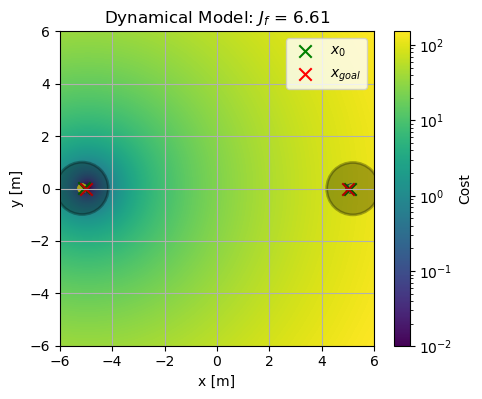

Converged!


In [124]:
U = np.zeros((N, ilqr.n_u))
for X, U, J in rhc.run(U, J_converge=10.0, n_lqr_iter=n_lqr_iter, tol=tol):
    print(f"{X.shape=}\t{U.shape=}\t{J=}")
    display.clear_output(wait=True)
    ilqr.plot(X,
          title_suffix=f': $J_f$ = {J:.3g}',
          do_headings=False, 
          surface_plot=True,
          log_colors=True,
          axis=(-6, 6, -6, 6),
          agent_ind=1)
    display.display(plt.gcf())
    plt.pause(0.1)

### Splitting up the Problem

In [99]:
step_size = 50
ilqr = iLQR(dynamics, game_cost, N=N)
rhc = RecedingHorizonController(x0, ilqr, step_size)

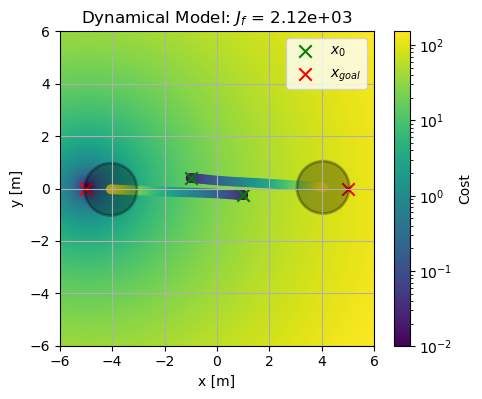

In [100]:
U = np.zeros((N, ilqr.n_u))
for X, U, J in rhc.run(U, J_converge=5.0, n_lqr_iter=n_lqr_iter, tol=tol):
    print(f"{X.shape=}\t{U.shape=}\t{J=}")
    display.clear_output(wait=True)
    ilqr.plot(X,
          title_suffix=f': $J_f$ = {J:.3g}',
          do_headings=False, 
          surface_plot=True,
          log_colors=True,
          axis=(-6, 6, -6, 6),
          agent_ind=1)
    display.display(plt.gcf())
    break

**GOAL: be able to split up a NavigationProblem (MultiDynamicalModel + GameCost) into sub-problems**
Tasks:
- initialize all sub-problems with the centralized solution
- when do we split the problem?
    + in the **curent** rolled out full trajectory, when two agents come within each others' planning radii
- how do we split the problem?
    + assign id's to each DynamicalModel and AgentCost (or combine them somehow) and split up accordingly

In [105]:
# def split_game(planning_radius=5.0):
planning_radius = 5.0

# X, _ = rhc._controller._rollout(x0, U)
dist = np.linalg.norm(X[:, pos_inds[0]] - X[:, pos_inds[1]], axis=1)
crash_mask = dist < COUPLING_RADIUS

In [106]:
dist < planning_radius

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [37]:
game_cost.coupling_costs[0].pos_inds

[(0, 1), (4, 5)]

## Miscellaneous

In [136]:
def animate(f, axis=None):
    """Callback to render the current frame as an image."""
    
    if axis is None:
        axis = (-7, 7, -7, 7)
    
    ilqr.plot(X[:f],
              Jf=Jf,
              do_headings=False, 
              surface_plot=False, 
              log_colors=True,
              coupling_radius=COUPLING_RADIUS,
              axis=axis
             )
    plt.ylim(axis[-2:])

In [137]:
gifname = 'traj.gif'
plt.figure(f3, clear=True)
anim = FuncAnimation(f3, animate, frames=range(1,N+1))
anim.save(gifname, fps=5)

MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

In [12]:
dist = np.linalg.norm(X[:, pos_inds[0]] - X[:, pos_inds[1]], axis=1)
crash_mask = dist < COUPLING_RADIUS

costs = np.zeros_like(dist)
for i, (x, u) in enumerate(zip(X, U)):
    costs[i] = game_cost(x, u)

In [13]:
plt.figure(f2, clear=True)
plt.clf()

f2.add_subplot(2,1,1)
plt.plot(dist)
plt.axhline(COUPLING_RADIUS, c='r')
plt.ylabel('Distance')

f2.add_subplot(2,1,2)
plt.plot(costs)
plt.ylabel('Cost')
plt.show()